<a href="https://colab.research.google.com/github/Fernando-Guerrero-Diaz/ADA-Informes/blob/main/Select.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Problema de Selección

**Entrada:** Arreglo $A$ de elementos númericos, junto a un índice $i$.

**Salida:** elemento $x$ del arreglo $A$, de tal modo que este sea mayor exactamente a $i-1$ elementos del arreglo.

Usando reducción de problemas, podemos modificar la función **Partition** para encontrar rápidamente el estádistico de orden que estamos buscando, usando un algoritmo llamado **Select**.

#2. PivotSelection
El algoritmo **Select** utiliza a un algoritmo llamado **PivotSelection** para encontrar una mediana de medianas con la cual aplicar partition. A continuación se encuentra la implementacion de ambos, ya que **Select** es llamado recursivamente por **PivotSelection**

##2.1 Código

In [8]:
import random

def InsertionSort(arreglo,start,end): 
    global comparaciones
    for i in range (start+1,end):
        aux = arreglo[i] 
        j = i-1 
        while (j>=start and aux < arreglo[j]): 
            comparaciones+=1
            arreglo[j+1] = arreglo[j] 
            j=j-1
        arreglo[j+1] = aux 
    return arreglo

def PivotSelection(array,start,end,verbose=False):
    n = end-start
    medians=[]
    for i in range(0, int(n/5)):
        InsertionSort(array, start + i*5, start+(i+1)*5)  
        medians.append(array[start + i*5 + 2])
    k = n%5
    if (k>0):
      InsertionSort(array,end-k,end)
      medians.append(array[end - int(k/2)-1])
    if verbose: print("Llamando recursivamente a Select con el arreglo de medianas")
    pivot = Select(medians, int(len(medians)/2), verbose)

    return pivot

def Partition(array, start, end,pivot):
  if start>=end: return start
  global comparaciones

  x = True
  i,j = start, start
  while j < end-1:
    comparaciones +=1
    if (x and array[j]==pivot ):
      x = False
      array[j] = array[end-1]
      array[end-1]=pivot
    if array[j] >= pivot:
      j=j+1
    else:
      aux = array[j]
      array[j]=array[i]
      array[i]= aux
      i=i+1
      j=j+1
  array[end-1]=array[i]
  array[i]=pivot
  return i

def Select(array,i,verbose=False):
    if verbose: print("Buscando estadístico de orden ",i, "en arreglo ", array)
    start = 0
    end = len(array)
    if len(array)<=1:
      return array[0]
    if i>end:
      if verbose: print("Orden de estadístico excede numero de elementos, buscando máximo en lugar de este")
      i=end
    if i<1:
      if verbose: print("Orden de estadístico muy bajo, buscando mínimo en lugar de este")
      i=1
    done= False
    while not done:

      pivot = PivotSelection(array,start,end,verbose)
      q=Partition(array,start,end,pivot)
      if verbose: print("pivote seleccionado:", pivot,"- posición del pivote:",q)
      if q==i-1: 
        if verbose: print("Encontrado estadístico de orden ",i,": ", array[q])
        return array[q]
      if q>i-1:
        end = q
        if verbose: print(q,"es mayor que", i, "- particionando subarreglo izquierdo:" , array[start:end])
      else:
        start = q+1
        if verbose: print(q,"es menor que", i, "- particionando subarreglo derecho:",array[start:end])

comparaciones = 0
a = random.sample(range(0, 25), 15)
print("Arreglo de entrada:", a)

pivot=PivotSelection(a,0,len(a))

print("Pivote Seleccionado:", pivot)
print("Arreglo luego de seleccion:", a)
print("Comparaciones:", comparaciones)

Arreglo de entrada: [16, 18, 20, 19, 8, 14, 24, 23, 13, 21, 17, 11, 22, 7, 4]
Pivote Seleccionado: 11
Arreglo luego de seleccion: [8, 16, 18, 19, 20, 13, 14, 21, 23, 24, 4, 7, 11, 17, 22]
Comparaciones: 23


##2.2 Descripción del algoritmo

El algoritmo recibe como entrada al arreglo `array` junto con índices `start` y `end` para delimitar el rango donde vamos a buscar el pivote.

1. Se calcula el largo del rango entre `start` y `end`, guardando el valor en `n`. También se crea un arreglo vacío `medians` en el cual insertaremos las medianas encontradas.

2. Se entra en un loop que itera `n/5` veces, aplicando **InsertionSort** con quintetos de elementos y guardando la mediana que se encuentra en el arreglo `medians`.
Si queda un resto de elementos, se aplica un último **InsertionSort** para obtener una mediana final.

3. Se llama a **Select** para encontrar la mediana de las medianas en el arreglo `medians`, y su valor se retorna como pivote.

##2.3 Ejemplo

A modo de ejemplo, digamos que queremos usar **PivotSelection** para seleccionar un buen pivote con el cual particionar al arreglo $A=[13, 5, 2, 3, 10, 14, 7, 9, 12, 4, 8, 11, 6]$

Recorremos el arreglo y realizamos un **InsertionSort** con los primeros 5 elementos. El arreglo queda de este modo:

$A=[2, 3, 5, 10, 13, 14, 7, 9, 12, 4, 8, 11, 6]$

Tomaremos al elemento que quedó al medio de este quinteto, que es $5$ en este caso, y lo guardaremos en el arreglo $medians$:

$medians=[5]$

Seguimos avanzando, aplicando **InsertionSort** con quintetos de elementos y guardando la mediana de cada uno.

$A=[2, 3, 5, 10, 13, 4, 7, 9, 12, 14, 8, 11, 6]$

$medians=[5,9]$

Ahora, nos quedan menos de 5 elementos, por lo que realizamos un último **InsertionSort** para obtener la última mediana.

$A=[2, 3, 5, 10, 13, 4, 7, 9, 12, 14, 6, 8, 11]$

$medians=[5, 9,8]$

Finalmente, llamaremos a **Select** para que encuentre la mediana de las medianas. Éste retorna $8$, el cual será nuestro pivote.

#3. Select

Ahora que sabemos como funciona **PivotSelection**, podemos explicar **Select**. El codigo solo incluye la ejeccución del algoritmo ya que **Select** fue definido en el bloque de código anterior.

##3.1 Código

In [9]:
comparaciones = 0
a = random.sample(range(0, 30), 15)

print("Arreglo de entrada:", a)
print("Buscando estadístico de orden 5")
i=Select(a,5)
print("Estadístico de orden 5:", i)
print("Arreglo luego de seleccion:", a)


Arreglo de entrada: [5, 17, 24, 7, 4, 25, 28, 23, 9, 1, 26, 8, 29, 27, 18]
Buscando estadístico de orden 5
Estadístico de orden 5: 8
Arreglo luego de seleccion: [4, 5, 1, 7, 8, 9, 17, 25, 29, 23, 18, 26, 27, 28, 24]


##3.2 Descripción del algoritmo

El algoritmo recibe como entrada al arreglo `array` junto a un índice `i` y a la variable `verbose` para imprimir por pantalla si se desea.

1. Se inicializan las variables `start` igual a `0` y `end` igual a la longitud de `array`. Si el arreglo solo tiene ún elemento, éste se retorna de immediato.

2. Si el índice `i` es menor a `1` o mayor a `end`, se modifica para encontrar el mínimo y el máximo del arreglo respectivamente.

3. Se entra a un while loop, en el cual se selecciona un pivote llamando a **PivotSelection**. Este pivote es usado para particionar al arreglo usando **Partition.**

4. Se chequea la posición donde quedó el pivote luego de la partición. Si este es igual a `i`, entonces encontramos el estadístico de orden i, por lo que retornaremos a `array[i]`. En caso de que sea mayor, se actualiza el `end` para que sea igual a la posición del pivote, y se vuelve a iterar, esta vez con el subarreglo izquierdo al pivote. Si es menor, se actualiza el `start` y se itera con el subarreglo derecho.

##3.3 Ejemplo

A modo de ejemplo, digamos que queremos usar **Select** para encontrar el estadístico de orden $5$ del arreglo $A=[7,4,10,5,2,1,9,14,8,13]$

Aplicamos **PivotSelection** considerando a todo el arreglo, y quedamos con pivote $9$. Luego se aplica **Partition** con este pivote, quedando el arreglo particionado de la siguiente forma:

$A=[(2, 4, 5, 7, 1, 8, |9|, 14, 13, 10)]$

El pivote $9$ quedo en la posición $7$, que es mayor a la posición $5$ que estamos buscando. Volvemos a aplicar **PivotSelection**, y obtenemos un pivote $4$. Se aplica **Partition** al subarreglo izquierdo al pivote anterior.

$A =[(1, 2, |4|, 5, 7, 8), 9, 14, 13, 10]$

El pivote quedó en la posición $3$, menor al $5$, por lo que volvemos a iterar con el subarreglo a la derecha. Se selecciona el pivote $7$ y se particiona.

$A =[1, 2, 4, (5, |7|, 8), 9, 14, 13, 10]$

$7$ quedó en la posición 5, por lo tanto este es nuestro estadístico de orden 5.



##3.4 Ejecución paso a paso (`verbose=True`)

A continuación se expone como funciona **Select** paso a paso usando la variable `verbose`.

In [10]:
comparaciones = 0
a = random.sample(range(0, 15), 10)

i=Select(a,5,True)

Buscando estadístico de orden  5 en arreglo  [8, 0, 4, 14, 1, 5, 13, 9, 7, 2]
Llamando recursivamente a Select con el arreglo de medianas
Buscando estadístico de orden  1 en arreglo  [4, 7]
Llamando recursivamente a Select con el arreglo de medianas
Buscando estadístico de orden  0 en arreglo  [4]
pivote seleccionado: 4 - posición del pivote: 0
Encontrado estadístico de orden  1 :  4
pivote seleccionado: 4 - posición del pivote: 3
3 es menor que 5 - particionando subarreglo derecho: [14, 13, 5, 7, 9, 8]
Llamando recursivamente a Select con el arreglo de medianas
Buscando estadístico de orden  1 en arreglo  [9, 8]
Llamando recursivamente a Select con el arreglo de medianas
Buscando estadístico de orden  0 en arreglo  [8]
pivote seleccionado: 8 - posición del pivote: 0
Encontrado estadístico de orden  1 :  8
pivote seleccionado: 8 - posición del pivote: 6
6 es mayor que 5 - particionando subarreglo izquierdo: [5, 7]
Llamando recursivamente a Select con el arreglo de medianas
Buscando est

#4. Correctitud
##4.1 Correctitud de Select
### **Teorema (Correctitud)**
*El algoritmo **Select**  recibe un arreglo de entrada $A=[a_1,a_2,...a_n]$ y un índice $i =< n$, y retorna un elemento $a_i \in A$ de modo que existan exactamente $i-1$ elementos menores a $a_i$ en $A$.*

##Prueba del Teorema

Utilizando inducción matemática, para probar esta aseveración denominada $P(n)$, debemos probar que se cumple para los siguientes casos:

1. $P(1)$. El caso base, que se puede interpretar como un arreglo de sólo un elemento en general, o un subarreglo acotado hasta que solo pueda contener un sólo elemento. En la primera interpretación, es obvio que el algoritmo es correcto, ya que $i$ tiene que ser menor o igual a $1$, asi que este único elemento será mayor a $i-1 = 0$ elementos, lo cual es trivialmente cierto. En la segunda interpretación, es un poco más complejo, pero sabemos que cuando este subarreglo es acotado $j$ por la izquierda luego del **Partition**, sabemos por seguro que hay $j$ elementos menores al elemento único del subarreglo en el arreglo original, por lo cual se podría consider un nuevo $i' = i-j$. Como en el peor caso, el algoritmo sigue iterando y acotando, en el momento que queda de ún solo elemento, el nuevo $i'$ que hay que considerar es de valor $1$, lo mismo que la primera interpretación. Por lo tanto, $P(1)$ es correcto.

2. Si $P(m)$ es cierto para $m < n$, probar $P(n)$. Supongamos que luego de seleccionar un pivote y particionar el arreglo, éste queda en una posición $j$. Sabemos entonces que el subarreglo a la izquierda tiene $j$ elementos menores al pivote y el de la derecha tiene $n-j$ elementos mayores al pivote. A continuación hay tres casos:

      2.1. Si $i-1 < j$ , entonces el algoritmo llama a **Select** con el subarreglo de la izquierda, el cual es de tamaño $j-1 < n$. Como $P(m)$ es correcto para $m < n$, este caso es correcto.

      2.2 Si $i-1 > j$ , entonces el algoritmo llama a **Select** con el subarreglo de la derecha, el cual es de tamaño $n-j < n$. Nuevamente este caso es menor por lo tanto es correcto.

      2.3 Si $i-1 = j$, este pivote se retorna como el estadístico que buscamos, ya que por definición de **Partition** tienen que haber $i-1$ elementos menores. Por lo tanto, es correcto.

Como ambos casos son correctos, $P(n)$ es correcto

#5. Tiempo de Ejecución

###**Teorema(Tiempo de ejecución)** 

*El algoritmo **Select** tiene un tiempo de ejecución de $O(nlogn)$ para la mayoría de los casos.*

Primero, analizemos el tiempo de ejecución de **PivotSelection**. Este recorre el arreglo y realiza **InsertionSort** con subarreglos de tamaño 5. Esto es pequeño para un **InsertionSort**, por lo cual podemos considerarlo un costo constante. Una vez tiene sus medianas, la función llama a **Select** con las medianas como entrada. Por lo tanto, la función temporal de **PivotSelection** es la siguiente:

$PS(n) = n/5*O(1) + S(n/5)$

Lo cual se puede reescribir como:

$PS(n) = O(n) + S(n/5)$

Ahora, revisemos a **Select**. Como sabemos que **PivotSelection** elige una mediana de medianas, podemos asegurar que en el peor caso, el pivote separará el arreglo en subarreglos de tamaño $n*3/10$ y $n*7/10$. Pero para propósito de demostración, mostraremos lo que pasa si el algoritmo tiene que llamarse recursivamente con un subarreglo  de tamaño $n*8/10$, opción naturalmente más costosa, peor que el peor caso.

Además, sabemos que **Partition** tiene un tiempo $O(n)$. A partir de esto, podemos definir la función temporal de **Select** como:

$S(n) = O(n) + S(n/5) + O(n) + S(4n/5)$ 

Combinando $O(n)$ queda reescrito de la siguiente forma:

$S(n) =S(n/5) + S(4n/5) + O(n)$ 

Realizando sustitución matemática, queremos probar que existe un $d$ de modo que se cumpla lo siguiente: 

$S(n) =< dnlogn$

Primero, remplazamos $O(n)$ por una constante y remplazamos $dnlogn$ en las llamadas de función.

$S(n) =dnlog(n/5)/5 +dnlog(4n/5)*4/5 + cn$ 

Luego, realizamos operaciones mátematicas para simplificar la inecuación.

$S(n) =dn(logn-log5)/5 +dn(logn +log4-log5)*4/5 + cn =< dnlogn$ 

$dn(logn-log5)/5 +dn(logn +log4-log4)*4/5 + cn =< dnlogn$ 

$dnlogn +dn(4log4-4log10 - log5)/5 + cn =< dnlogn$ 

Eliminando $dnlogn$ en ambos lados y cambiando factores de lugar, quedamos con esto:

$cn =< dn(log5 +4log10 -4log4)/5$

Finalmente, dividiendo por $n$, quedamos con la inecuación final:

$c =< d(log5 +4log10 -4log4)/5$

Como $c$ es una constante y $d$ es un número cualquiera, se prueba que existe un $d$ de modo que se cumpla $S(n) =< dnlogn$. Y como lo probamos con un caso similar pero peor al peor caso, podemos asegurar que funciona como cota superior en el peor caso real y en el caso general.

Por lo tanto, **Select** tiene una cota superior de $nlogn$.


#6. Experimentos

##6.1 Comparaciones: experimental vs Peor y Mejor Caso teórico.
El mejor caso lo podemos asumir como el caso donde el arreglo está ordenado (cada **insertionSort** realiza 5 comparaciones, dando $n$ comparaciones en total para el **PivotSelection**). Este tendría $2n$ comparaciones, mas un extra por llamar a **Select** nuevamente con las medianas.

En el peor caso, cada **insertionSort** realiza $20$ comparaciones y el algoritmo itera hasta que llega a un subarreglo de tamaño $1$. Esto daría $4nlogn$ comparaciones.

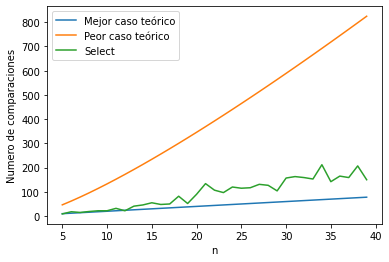

In [11]:
import matplotlib.pyplot as plt
import math
import random

start,stop = 5,40
x=[n for n in range(start,stop)] 
t1=[(2*n) for n in range(start,stop)]; 
t2=[((4*n)*math.log2(n)) for n in range(start,stop)];
y0=[];


for n in range(start,stop):

  a = random.sample(range(1, 300), n) #Arreglo de entrada aleatoria
  i = random.randint(1,n)

  comparaciones = 0
  Select(a,i)
  y0.append(comparaciones)




plt.plot(x,t1)
plt.plot(x,t2)  
plt.plot(x,y0)


plt.legend(['Mejor caso teórico','Peor caso teórico', 'Select'])

plt.xlabel('n')
plt.ylabel('Numero de comparaciones')
plt.show()

Sin embargo, podemos apreciar que en casos generales, **Select** se aproxima mucho más al mejor caso, lo cual es casi lineal. Esto se puede explicar por el hecho de que las primeras pasadas de **PivotSelection** y **Partition** ordenan el arreglo lo suficiente para evitar que se continue con algo similar al peor caso.

##6.2 Select vs R-Select

**R-Select** es la versión de **Select** que no se preocupa por escoger una mediana de medianas como pivote, y simplemente elige un pivote aleatorio. A continuación realizaremos un experimento para revisar si el costo temporal tener un mejor pivote compara con escoger pivote al azar.

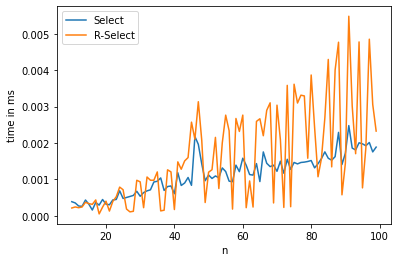

In [12]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

def RSelect(array,i,verbose=False):
    if verbose: print("Buscando estadístico de orden ",i, "en arreglo ", array)
    start = 0
    end = len(array)
    if len(array)<=1:
      return array[0]
    if i>end:
      if verbose: print("Orden de estadístico excede numero de elementos, buscando máximo en lugar de este")
      i=end
    if i<1:
      if verbose: print("Orden de estadístico muy bajo, buscando mínimo en lugar de este")
      i=1
    done= False
    while not done:

      pivot = random.randint(start,end)
      q=Partition(array,start,end,pivot)
      if verbose: print("pivote seleccionado:", pivot,"- posición del pivote:",q)
      if q==i-1: 
        if verbose: print("Encontrado estadístico de orden ",i,": ", array[q])
        return array[q]
      if q>i-1:
        end = q
        if verbose: print(q,"es mayor que", i, "- particionando subarreglo izquierdo:" , array[start:end])
      else:
        start = q+1
        if verbose: print(q,"es menor que", i, "- particionando subarreglo derecho:",array[start:end])


x=[] 
y0=[]
y1=[]


for n in range(10,100):
  i = random.randint(1,n)
  a = random.sample(range(1, 300), n) 
  b = a.copy()
  t0 = repeat(setup="from __main__ import Select", stmt=f"Select({a},{i})", repeat=1, number=10)
  t1 = repeat(setup="from __main__ import RSelect", stmt=f"RSelect({b},{i})", repeat=1, number=10)

  x.append(n)
  y0.append(t0)
  y1.append(t1)


plt.plot(x,y0)
plt.plot(x,y1)

plt.legend(["Select","R-Select", ])


plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

Como es de esperar, **R-Select** tiene un tiempo de ejecución bastante disparatado. Hay muchos puntos en el grafo donde se demora menos que **Select** (quizas por eligir el pivote correcto a la primera), pero visto en general, su tiempo de ejecución es mayor al de **Select**, por lo que este resulta mas eficiente a largo plazo.